In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Finding the factors which affects TIPS target variable using regulization techniques

### Setting up data like doing encoding , Scaling and splitting into train and test for regulization 

In [8]:
data = pd.read_csv("tips (data for regression problem).csv")
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = data_encoded.drop("tip", axis=1)
y = data_encoded["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Training the regulization model and PLotting the Coefficients in sorted order(desending) to Show the importance of Each coeffecient

Optimal alpha for Ridge Regression: 10.0
Optimal alpha for Lasso Regression: 0.1

Significant Features according to Lasso Regression:
size          0.184788
total_bill    0.731174
dtype: float64

Ridge Regression Coefficients (sorted by absolute value):
total_bill    0.772854
size          0.236744
smoker_Yes    0.078084
day_Sat       0.069998
day_Thur      0.044002
time_Lunch    0.018167
sex_Male      0.016609
day_Sun       0.006122
dtype: float64


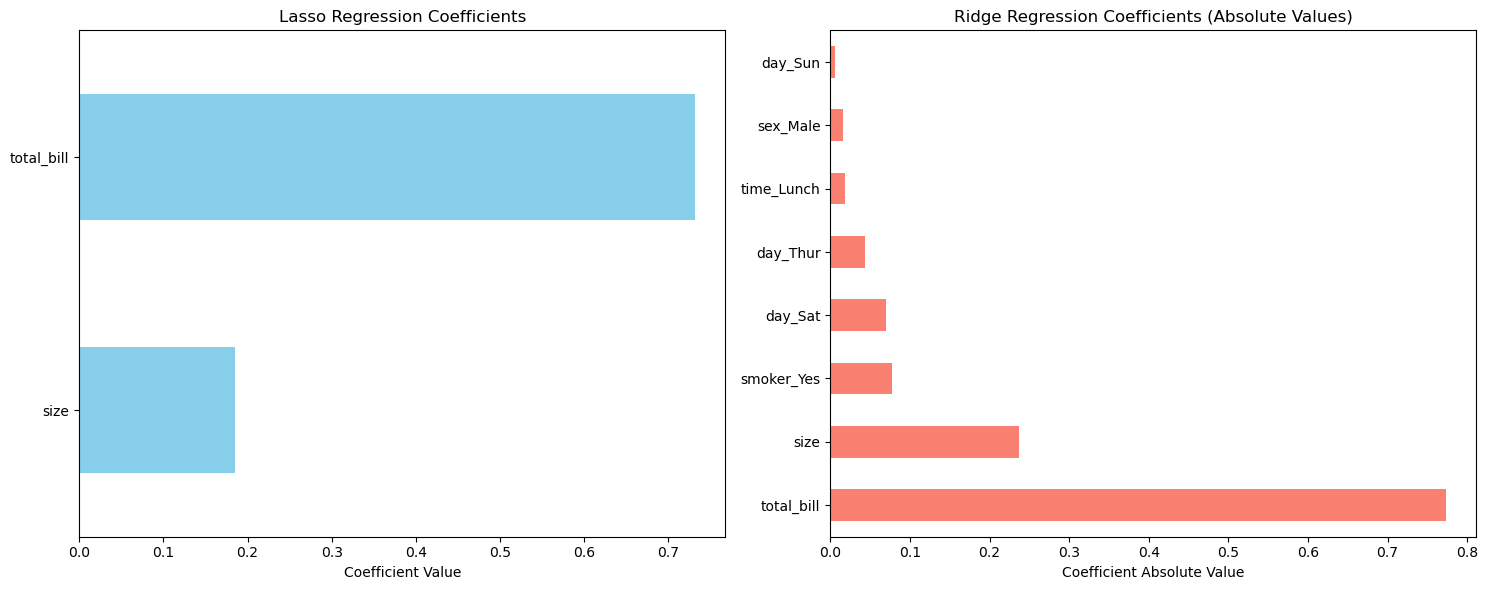


Ridge Regression Performance on Test Set:
  R-squared: 0.4453
  MAE: 0.6664
  MSE: 0.6934

Lasso Regression Performance on Test Set:
  R-squared: 0.5102
  MAE: 0.6548
  MSE: 0.6122


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score, accuracy_score
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=10000)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
ridge_coefficients = pd.Series(ridge.coef_, index=X.columns)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
print(f"Optimal alpha for Ridge Regression: {ridge.alpha_}")
print(f"Optimal alpha for Lasso Regression: {lasso.alpha_}")
significant_features_lasso = lasso_coefficients[lasso_coefficients != 0].sort_values()
print("\nSignificant Features according to Lasso Regression:")
print(significant_features_lasso)
ridge_coefficients_sorted = ridge_coefficients.abs().sort_values(ascending=False)
print("\nRidge Regression Coefficients (sorted by absolute value):")
print(ridge_coefficients_sorted)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
significant_features_lasso.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Lasso Regression Coefficients')
axes[0].set_xlabel('Coefficient Value')
ridge_coefficients_sorted.plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Ridge Regression Coefficients (Absolute Values)')
axes[1].set_xlabel('Coefficient Absolute Value')
plt.tight_layout()
plt.show()
models = {'Ridge Regression': ridge, 'Lasso Regression': lasso}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Performance on Test Set:")
    print(f"  R-squared: {r2_score(y_test, y_pred):.4f}")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")

    

### 	Predicting Accuracy: Building Regulization model to forecast tips effectively.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV
import numpy as np
alphas = np.logspace(-6, 6, 13)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge_grid_search = GridSearchCV(ridge, param_grid={'alphas': [alphas]}, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_scaled, y_train)
print(f"Best alpha for Ridge Regression: {ridge_grid_search.best_params_['alphas'][0]}")
print(f"R2 Score for best Ridge model: {r2_score(y_test, ridge_grid_search.best_estimator_.predict(X_test_scaled))}")
lasso = LassoCV(alphas=alphas, max_iter=10000, cv=5)
lasso_grid_search = GridSearchCV(lasso, param_grid={'alphas': [alphas]}, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train_scaled, y_train)
print(f"Best alpha for Lasso Regression: {lasso_grid_search.best_params_['alphas'][0]}")
print(f"R2 Score for best Lasso model: {r2_score(y_test, lasso_grid_search.best_estimator_.predict(X_test_scaled))}")



Best alpha for Ridge Regression: 1e-06
R2 Score for best Ridge model: 0.44528039059981683
Best alpha for Lasso Regression: 1e-06
R2 Score for best Lasso model: 0.5102212625960605


# Insights for Management:

## Total Bill and Tip Correlation
- **Insight**: Total bill has the highest positive impact on tip amounts. Larger bills lead to higher tips.
- **Action**: Consider promotions or upselling strategies to increase total bill (e.g., premium menu items or dessert options for larger bills).

## Party Size as a Key Factor
- **Insight**: Larger dining parties tend to leave higher tips.
- **Action**: Allocate attentive staff to larger groups, encourage reservations for larger parties, and offer group discounts or family packages.

## Impact of Smoking and Demographic Details
- **Insight**: Smoking status and dining on Saturdays or Thursdays slightly increase tips.
- **Action**: Offer promotions for Saturday/Thursday diners, and consider designated smoking areas to enhance satisfaction.

## Meal Time and Gender Influence
- **Insight**: Lunch patrons and male guests tend to tip slightly less.
- **Action**: Offer "add-on" options like appetizers during lunch, and provide quicker service to attract repeat business.

## Enhancing Customer Service Strategies
- **Insight**: Focus on total bill and party size to tailor service.
- **Action**: Train staff to prioritize high-tipping customer segments (e.g., large parties or high bills) for exceptional service.

# Revenue Management and Future Planning

## Targeted Marketing
- **Action**: Develop campaigns for weekends and larger parties based on tipping patterns.

## Operational Efficiency
- **Action**: Optimize staff for peak days and times to enhance customer experience without increasing costs.

## Data-Driven Strategy Adjustments
- **Action**: Regularly analyze tipping data to adjust pricing, promotions, and staff allocation based on trends.

By leveraging these insights, restaurants can optimize revenue and improve customer service, fostering higher customer satisfaction and loyalty.


### Training the Linear regression model and PLotting the Coefficients in sorted order(desending) to Show the importance of Each coefficient


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False]
}
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
X = data_encoded.drop("tip", axis=1)
y = data_encoded["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("Predicted y values:", y_pred)


Best Parameters: {'fit_intercept': True}
Mean Squared Error: 0.7033566017436103
Predicted y values: [2.91436632 2.00292613 3.96425583 3.76380832 2.14836306 2.67423448
 3.63934628 2.29147245 2.57207155 2.45851225 2.90446763 2.0573337
 2.11817193 2.35130838 1.82976215 3.10830675 2.95140176 3.21602976
 2.56640892 5.73957295 3.43490366 3.22645102 2.17139823 1.94180002
 3.16394533 2.24547894 2.14497574 3.21025435 3.20097595 6.66803147
 5.01111235 1.57804024 3.1909877  2.76652194 2.98412862 3.85695724
 2.17008741 5.46673999 2.35586827 2.99190732 2.03271177 2.48465991
 3.44046814 2.35532237 1.92528104 0.87348926 1.81911521 3.04083954
 1.85436902]


[0.23348392529551037, 0.09495716090944499, 0.09469973687364396, 0.028819282882043277, -0.05079338773005527, -0.17972097719353922, -0.18578529673367086, -0.1923532517630701]


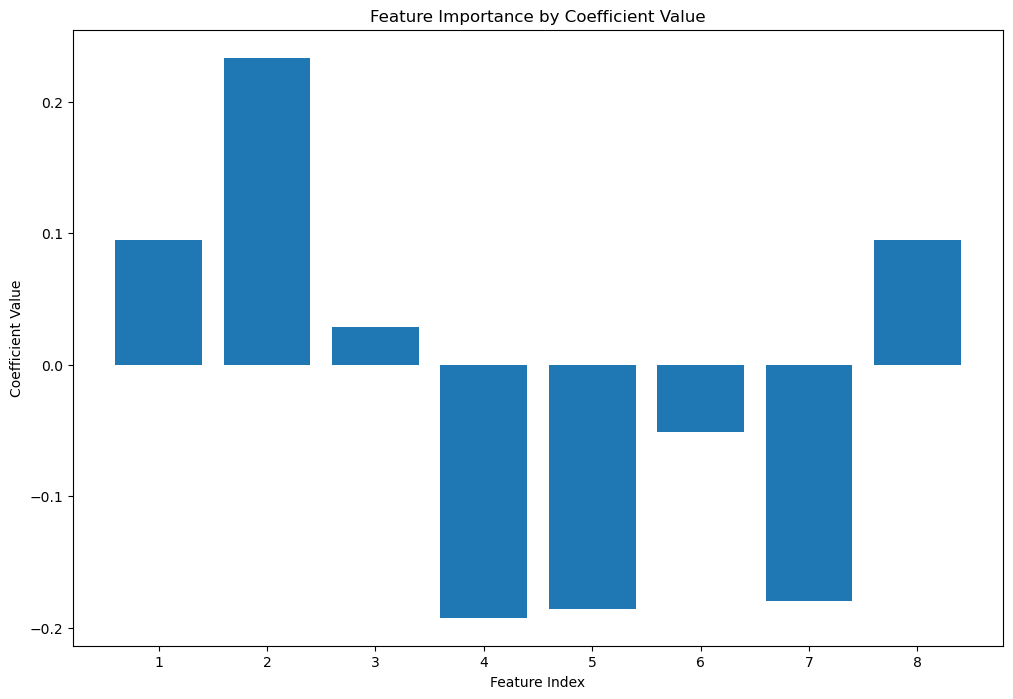

In [12]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = best_model.coef_
a = sorted(feature_importance, reverse=True)
print(a)
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance by Coefficient Value")
plt.xticks(ticks=np.arange(len(feature_importance)), labels=np.arange(1, len(feature_importance) + 1))
plt.show()


plt.show()


### Insights from Feature Coefficients

Based on the coefficients for each feature, we can draw the following insights:

1. **Positive Influence**:
   - **`total_bill` (0.233)**: This feature has the highest positive coefficient, indicating that as the total bill increases, the target variable (likely the tip or total amount paid, if this is a tipping dataset) also increases. This is expected, as higher bills often correlate with higher tips.
   - **`size` (0.095)**: The number of people also positively impacts the target, meaning that larger groups tend to contribute more to the outcome, though its influence is smaller than the total bill.
   - **`smoker_Yes` (0.095)**: Being a smoker positively correlates with the target variable. This might indicate that smokers, on average, contribute slightly more to the target, possibly tipping more or having larger bills.

2. **Lower Influence (Near Zero)**:
   - **`day_Sat` (0.028)**: Saturday has a small positive influence on the outcome, meaning it slightly raises the target. The low coefficient indicates that this effect is minimal compared to other features.

3. **Negative Influence**:
   - **`day_Thur` (-0.051)**: Thursday has a small negative impact, implying that the target variable is slightly lower on this day, though the effect is minor.
   - **`time_Lunch` (-0.180)**: Lunch has a larger negative effect compared to Thursday, suggesting that the target (e.g., tip or total payment) tends to be lower for lunch compared to other times.
   - **`sex_Male` (-0.186)**: Being male has a negative impact on the target, meaning males contribute slightly less to the outcome.
   - **`day_Sun` (-0.192)**: Sunday has the most negative impact, indicating that the target tends to be lower on this day, which could suggest lower spending or tipping behavior on Sundays.

### Key Takeaways
- **Most significant factors**: `total_bill` and `size` contribute the most positively to the outcome, while `day_Sun` and `time_Lunch` have the most substantial negative impact.
- **Slight influences**: Features like `day_Sat` and `day_Thur` have very small effects, suggesting they don’t strongly influence the target variable.

These coefficients help identify which factors are most strongly associated with changes in the target variable, giving insight into customer behavior patterns and potentially guiding strategies for maximizing the/ outcome (like tips or total revenue).


## 	Prediction Accuracy to forcast tips effectively for models like decision tree regression, ensemble methods (e.g., random forest), Support Vector Regression (SVR) and KNN

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
models = {
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {'max_depth': [None, 10, 20, 30]}),
    'Random Forest': (RandomForestRegressor(random_state=42), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'SVR': (SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}),
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']})
}

results = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    results[name] = {
        'Best Params': grid_search.best_params_,
        'R-squared': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    }
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance on Test Set:")
    print(f"  Best Params: {metrics['Best Params']}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")



Decision Tree Performance on Test Set:
  Best Params: {'max_depth': 10}
  R-squared: -0.0325
  MAE: 0.8464
  MSE: 1.2906

Random Forest Performance on Test Set:
  Best Params: {'max_depth': 10, 'n_estimators': 100}
  R-squared: 0.2737
  MAE: 0.7535
  MSE: 0.9078

SVR Performance on Test Set:
  Best Params: {'C': 1, 'epsilon': 0.1}
  R-squared: 0.3800
  MAE: 0.6800
  MSE: 0.7749

KNN Performance on Test Set:
  Best Params: {'n_neighbors': 10, 'weights': 'distance'}
  R-squared: 0.3388
  MAE: 0.7111
  MSE: 0.8264


### Checking which factors signiicantly affect tips by plotting coefficients of different features

total_bill    0.795995
size          0.049380
sex_Male      0.025004
smoker_Yes    0.064184
day_Sat       0.004349
day_Sun       0.034408
day_Thur      0.022063
time_Lunch    0.004617
dtype: float64
total_bill    0.768309
size          0.058426
sex_Male      0.025199
smoker_Yes    0.070167
day_Sat       0.028486
day_Sun       0.025105
day_Thur      0.012411
time_Lunch    0.011897
dtype: float64


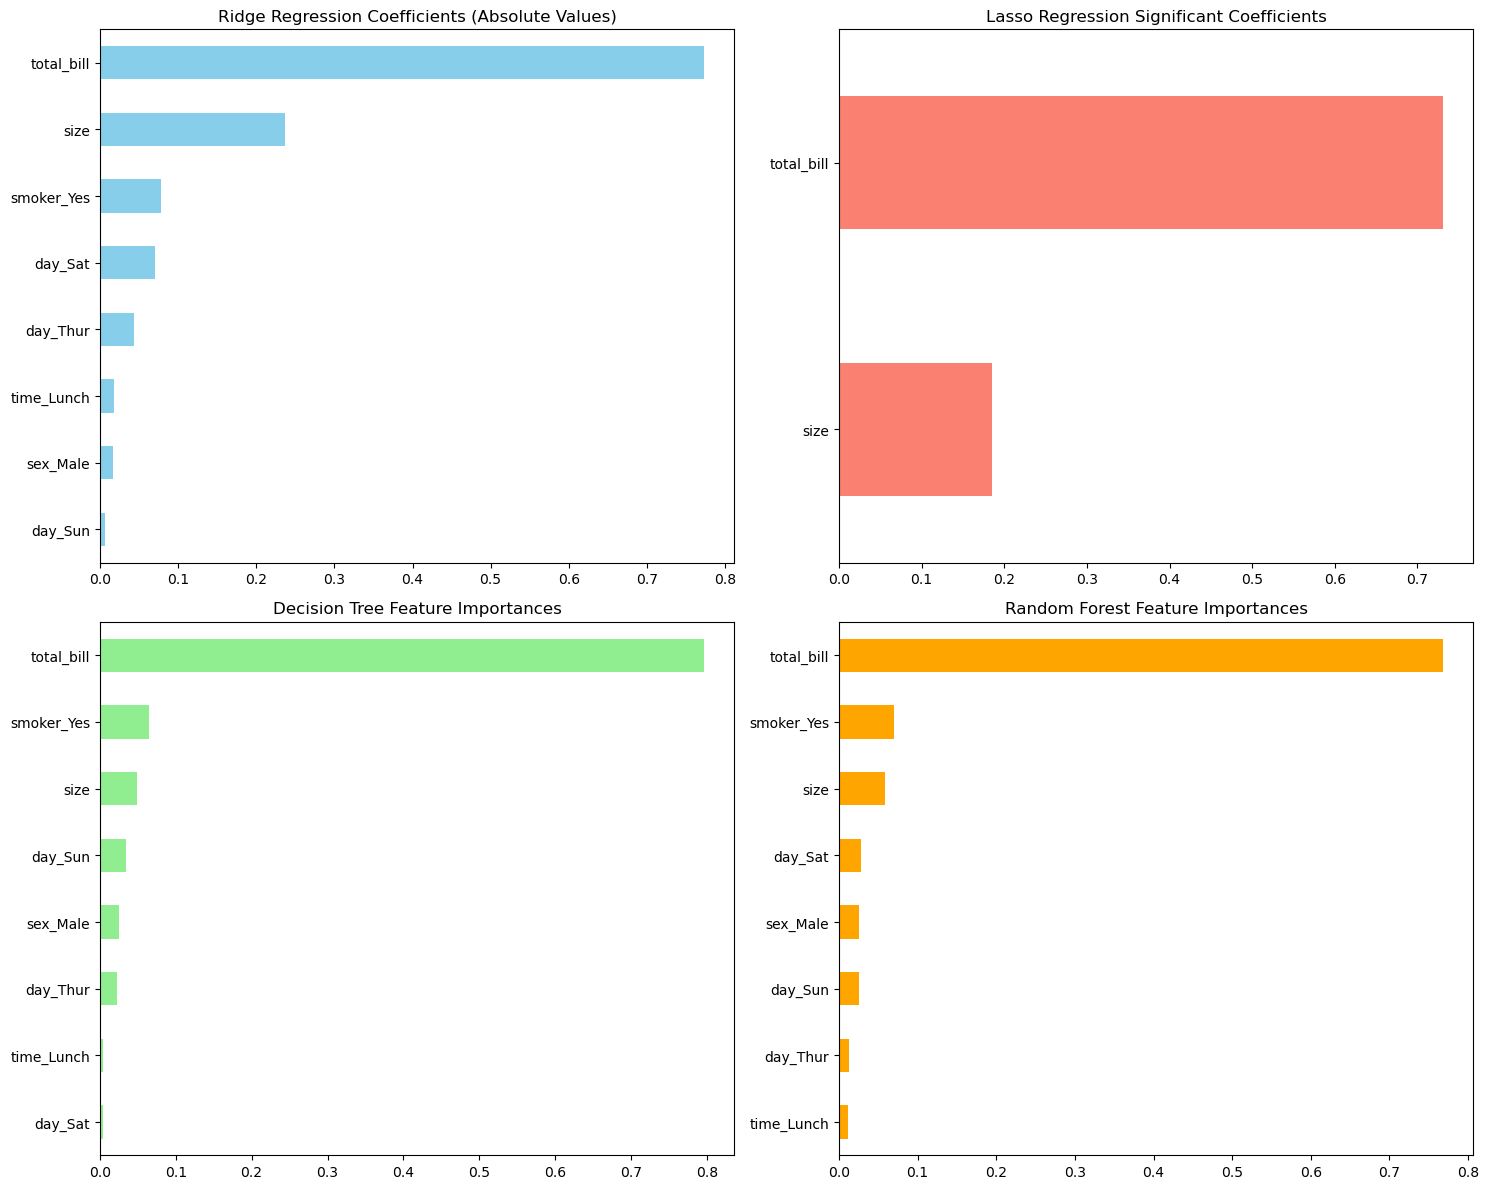

In [24]:
ridge_coefficients = pd.Series(ridge.coef_, index=X.columns)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
decision_tree_importance = pd.Series(decision_tree.feature_importances_, index=X.columns)
random_forest_importance = pd.Series(random_forest.feature_importances_, index=X.columns)
print(decision_tree_importance)
print(random_forest_importance)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
ridge_coefficients.abs().sort_values().plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Ridge Regression Coefficients (Absolute Values)')
lasso_coefficients[lasso_coefficients != 0].sort_values().plot(kind='barh', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Lasso Regression Significant Coefficients')
decision_tree_importance.sort_values().plot(kind='barh', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Decision Tree Feature Importances')
random_forest_importance.sort_values().plot(kind='barh', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Random Forest Feature Importances')

plt.tight_layout()
plt.show()

# Insights for Management: Using Feature Importances to Drive Service and Revenue Strategies

The feature importances from the **Decision Tree** and **Random Forest** models provide actionable insights to improve customer service and revenue strategies. Below is an analysis of each feature and recommended actions based on its impact on tip amounts.

## Feature Analysis and Actionable Insights

### 1. **Total Bill** 
   - **Importance**: 0.796 (Decision Tree), 0.768 (Random Forest)
   - **Interpretation**: The total bill is the most influential factor affecting tips, suggesting that higher spending correlates with higher tips.
   - **Actionable Insight**: Train servers in upselling techniques to encourage additional orders, such as appetizers, desserts, or premium beverages. Consider promotions or package deals to increase total bills, which may lead to increased tips.

### 2. **Party Size**
   - **Importance**: 0.049 (Decision Tree), 0.058 (Random Forest)
   - **Interpretation**: Larger groups are associated with higher tips, possibly due to social expectations in group dining.
   - **Actionable Insight**: Provide a personalized dining experience for larger parties, such as group specials or sharing platters. Ensure efficient service to enhance satisfaction, which could lead to higher tips.

### 3. **Smoker Status (smoker_Yes)**
   - **Importance**: 0.064 (Decision Tree), 0.070 (Random Forest)
   - **Interpretation**: Smokers tend to leave slightly higher tips, suggesting that a smoker-friendly environment could influence tipping behavior.
   - **Actionable Insight**: Consider offering dedicated smoker-friendly seating areas. Making smokers feel comfortable might improve their dining experience and potentially increase tips from this segment.

### 4. **Gender (sex_Male)**
   - **Importance**: 0.025 (Decision Tree), 0.025 (Random Forest)
   - **Interpretation**: Male customers have a minor but consistent impact on tipping behavior.
   - **Actionable Insight**: While the effect is subtle, servers might personalize their approach based on gender preferences. However, avoid overemphasis here as the gender difference is minor.

### 5. **Day of the Week**
   - **Importance**:
      - **Saturday**: 0.004 (Decision Tree), 0.028 (Random Forest)
      - **Sunday**: 0.034 (Decision Tree), 0.025 (Random Forest)
      - **Thursday**: 0.022 (Decision Tree), 0.012 (Random Forest)
   - **Interpretation**: Weekend days, especially Sundays, show a slight increase in tip amounts. This may reflect a weekend effect where customers are more relaxed and inclined to tip.
   - **Actionable Insight**: Schedule experienced staff on weekends to ensure high service quality. Consider weekend promotions to draw in more customers, potentially leading to increased total bills and tips.

### 6. **Time of Day (time_Lunch)**
   - **Importance**: 0.004 (Decision Tree), 0.011 (Random Forest)
   - **Interpretation**: Lunch times show slightly lower tipping amounts, possibly due to shorter meal durations or lower bills compared to dinner.
   - **Actionable Insight**: Offer lunch specials and quick-service menu items to attract more lunch customers. Exceptional service during lunch can help maintain good tip levelsorest Feature Importances')
plt.tight_layout()
plt.show()


### 1. Scatter Plot

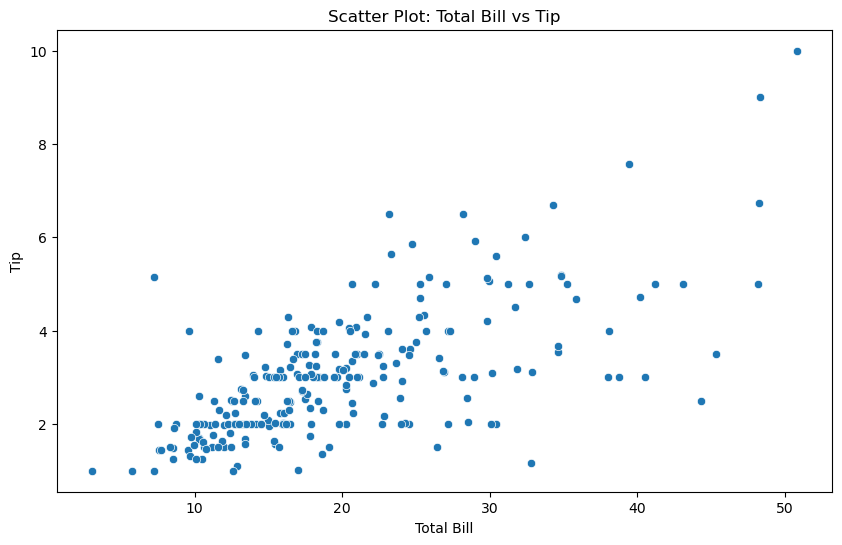

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_encoded['total_bill'], y=data_encoded['tip'])
plt.title("Scatter Plot: Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


### 2. **Pair Plot for Multiple Features**

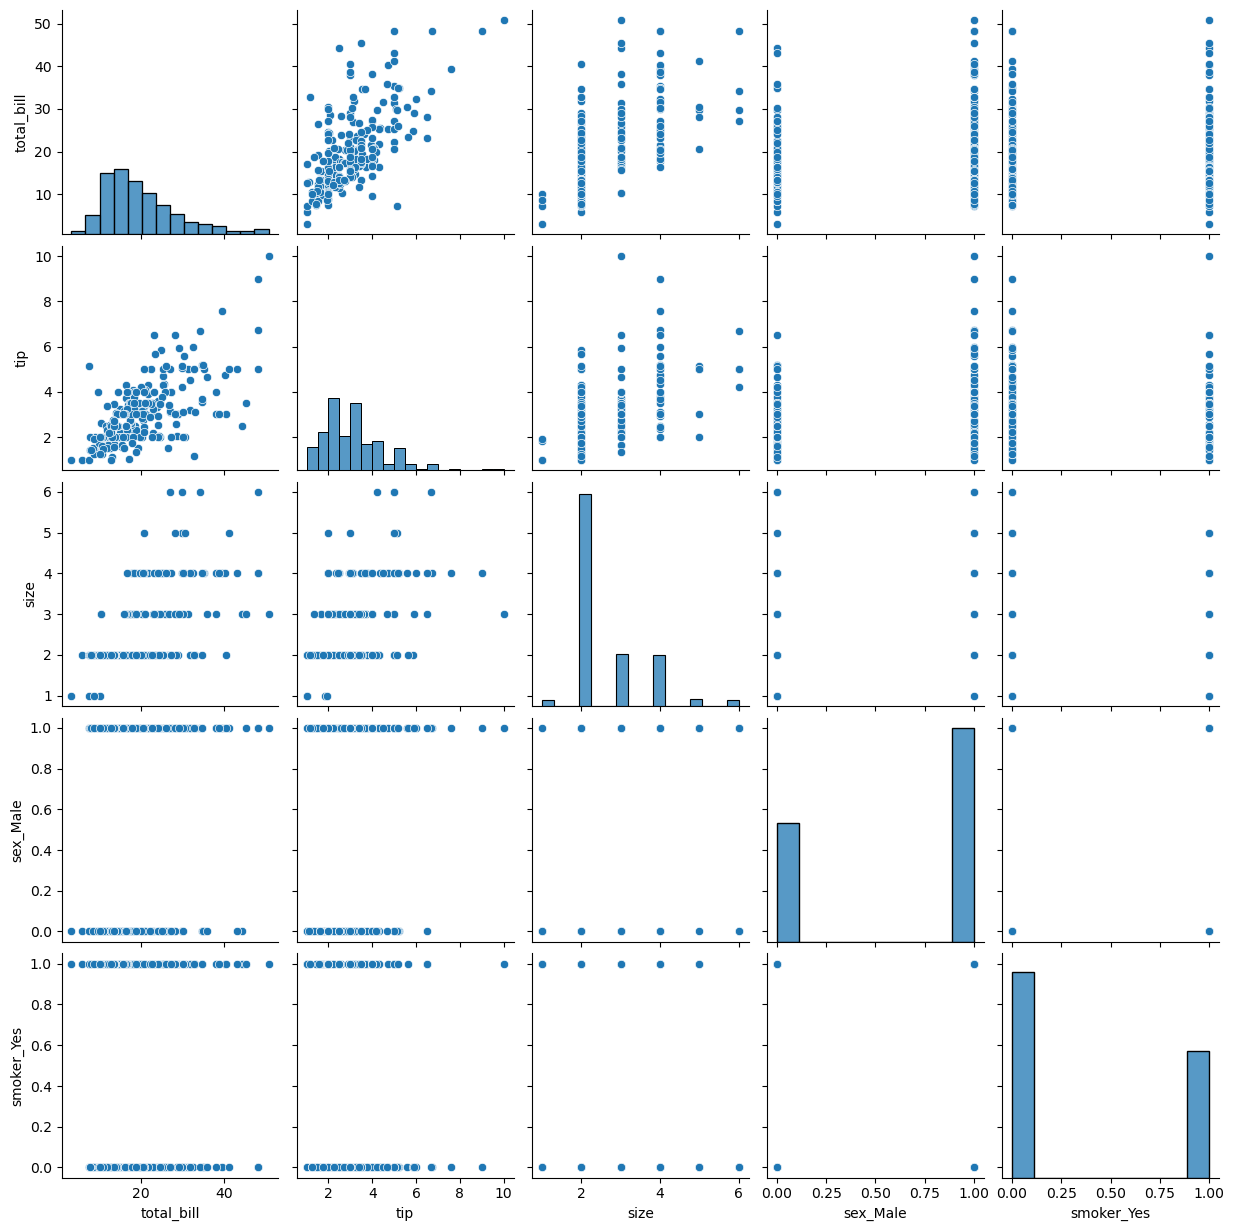

In [28]:
sns.pairplot(data_encoded[['total_bill', 'tip', 'size', 'sex_Male', 'smoker_Yes']])
plt.show()


### 3. **Correlation Matrix (Heatmap)**
A **correlation matrix** shows the pairwise correlation coefficients between variables in the dataset. The **heatmap** provides a visual representation of the correlation matrix, where color intensity indicates the strength of the relationship. This is particularly useful to identify linear dependencies between features.


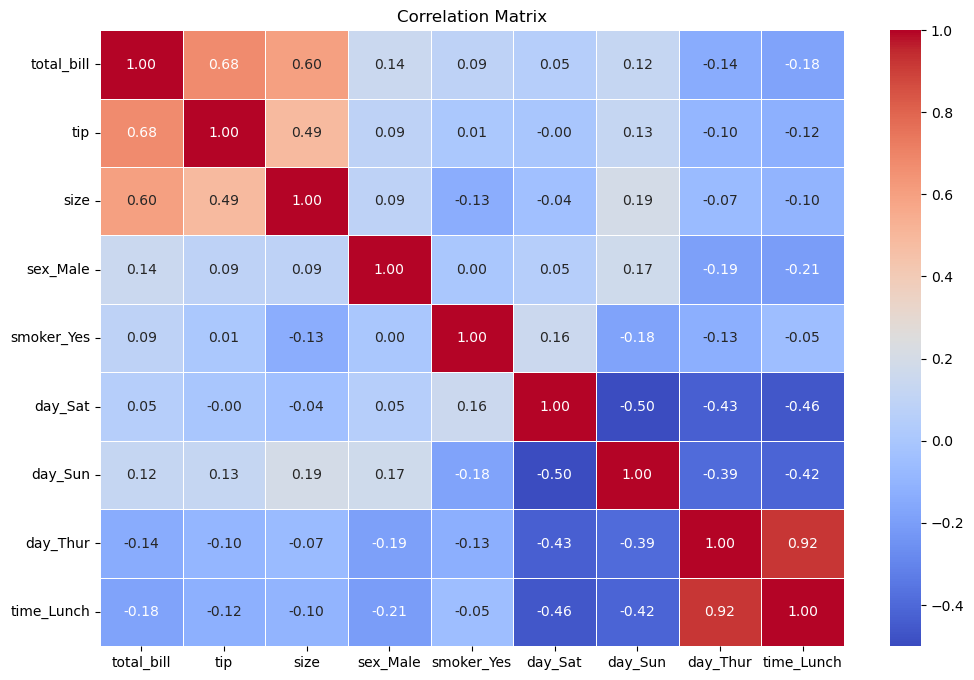

In [29]:

correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### 5. **Residuals Plot**
A **residuals plot** displays the difference between observed and predicted values (residuals) against the predicted values. This plot helps check for patterns in residuals that could indicate issues such as heteroscedasticity, non-linearity, or outliers.


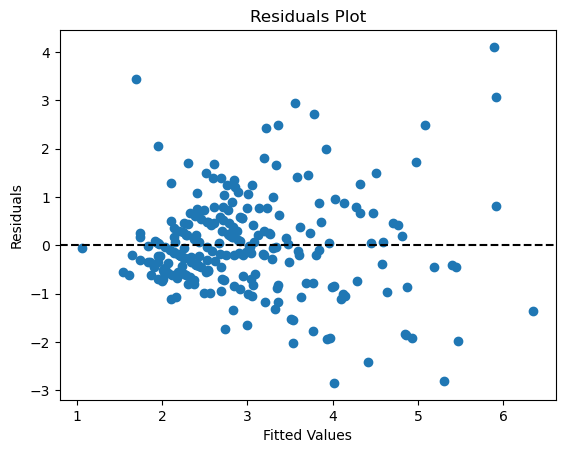

In [43]:

import matplotlib.pyplot as plt
residuals = model_sm.resid
plt.scatter(model_sm.fittedvalues, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


In [52]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### 6. **Line Plot (for Time-Series Data)**
A **line plot** is a useful tool for visualizing time-series data, where the x-axis represents time, and the y-axis shows the variable of interest. It helps in identifying trends, seasonal patterns, and cyclic behaviors in the data over time.


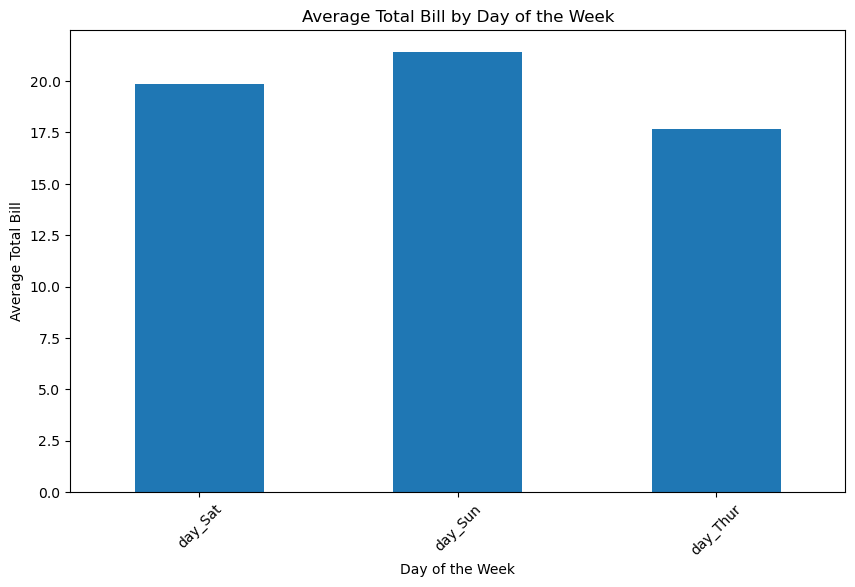

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
day_columns = ['day_Sat', 'day_Sun', 'day_Thur']
data_encoded['day'] = data_encoded[day_columns].idxmax(axis=1)
plt.figure(figsize=(10, 6))
data_encoded.groupby('day')['total_bill'].mean().plot(kind='bar')
plt.title("Average Total Bill by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Total Bill")
plt.xticks(rotation=45)
plt.show()


### 4. **Statistical Tests for Linearity (Rainbow Test)**
The **Rainbow Test** is a statistical test used to assess the linearity assumption of a model. It tests the null hypothesis that the model is correctly specified. A significant p-value suggests that the model may not be appropriately specified, and further examination is required.


In [65]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag

# Apply numeric conversion and handle missing values
X_numeric = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X_numeric = X_numeric.fillna(0)
y = y.fillna(0)

# Convert boolean columns to int if needed
X_numeric = X_numeric.apply(lambda x: x.astype(int) if x.dtype == bool else x)

# Ensure the correct data types
print(X_numeric.dtypes)
print(y.dtypes)
print(X_numeric.shape)
print(y.shape)

# Add an intercept (constant term) to the independent variables matrix
X_with_intercept = sm.add_constant(X_numeric)

# Fit the OLS model
try:
    model_sm = sm.OLS(y, X_with_intercept).fit()
    print(model_sm.summary())  # Show model summary

    # Perform the Rainbow test on the fitted model
    rainbow_test_result = diag.linear_rainbow(model_sm)
    print("Rainbow Test Statistic:", rainbow_test_result[0])
    print("p-value of Rainbow Test:", rainbow_test_result[1])

except Exception as e:
    print(f"Error fitting the model: {e}")


const         float64
total_bill    float64
size            int64
sex_Male        int32
smoker_Yes      int32
day_Sat         int32
day_Sun         int32
day_Thur        int32
time_Lunch      int32
dtype: object
float64
(244, 9)
(244,)
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.20e-28
Time:                        17:02:09   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                

### Conclusion

The results of the **Rainbow Test** indicate that the model is likely correctly specified. Specifically:

- **Rainbow Test Statistic**: 1.197
- **p-value**: 0.1659

Since the p-value is greater than the standard significance threshold of 0.05, we fail to reject the null hypothesis that the model is correctly specified. This suggests that there is no strong evidence of misspecification in the model's functional form.

Thus, the model appears to be well-specified based on the Rainbow Test. However, it is recommended to consider additional diagnostic tests and residual analysis for a more comprehensive evaluation of the model's adequacy.
